<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [196]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup, UnicodeDammit
import requests

from sklearn.feature_extraction.text import CountVectorizer

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [197]:
df = pd.read_csv('./data/job_listings.csv', encoding='utf-8')
df = df[['description', 'title']]
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-197-c0eba6300849>", line 1, in <module>
    df = pd.read_csv('./data/job_listings.csv', encoding='utf-8')
  File "/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/pandas/io/parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/pandas/io/parsers.py", line 448, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/pandas/io/parsers.py", line 880, in __init__
    self._make_engine(self.engine)
  File "/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/pandas/io/parsers.py", line 1114, in _make_engine
    self._engine = CParserWrapper(self.f, **sel

FileNotFoundError: [Errno 2] No such file or directory: './data/job_listings.csv'

In [99]:
def parse(text):
    soup = BeautifulSoup(text)
    raw_text = soup.get_text()
    text = raw_text.replace('\\n', ' ')
    return text

In [102]:
df['description'] = df['description'].apply(parse)

## 2) Use Spacy to tokenize the listings 

In [154]:
STOP_WORDS = ['job', 'requirements', 'apply', 'now', 'description', 'data', 'experience', 'science', 'business', 'work', 'team', 'skills', 'solutions', 'new', 'ability', 'xe2' 'x80' 'x99s']
STOP_WORDS = nlp.Defaults.stop_words.union(STOP_WORDS)

In [109]:
nlp = spacy.load('en_core_web_lg')

In [110]:
def get_lemmas(text):
    '''
    Input: dataframe column of text
    Output: list of lemmas
    '''
    doc = nlp(text)
    
    lemmas = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.pos_ != 'PRON') & (token.is_alpha == True):
            lemmas.append(token.lemma_)
            
    return lemmas

In [ ]:
df['tokens'] = df['description'].apply(get_lemmas)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [156]:
# DENSE FORMAT
data = df['description']
vect = CountVectorizer(stop_words=list(STOP_WORDS))
vect.fit(data)
dtm = vect.transform(data)
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [157]:
dtm.shape

(426, 8491)

In [158]:
dtm['word_count_by_listing'] = dtm.sum(axis=1)

In [159]:
dtm['word_count_by_listing'].head()

0     74
1    346
2     61
3    149
4     18
Name: word_count_by_listing, dtype: int64

## 4) Visualize the most common word counts

In [166]:
words = dtm.drop(['word_count_by_listing'], axis=1)
word_count = pd.DataFrame({'word_count': words.sum(), 'rank': words.sum().rank(method='first', ascending=False)})
# words['rank'] = words.rank(method='first', ascending=False)
# words = words.sort_values(by='rank')
word_count = word_count.sort_values(by='rank')
word_count = word_count.reset_index()
word_count = word_count.rename(columns={'index': 'word'})
word_count.head()

,word,word_count,rank
0,xe2,1417,1.0
1,x80,1404,2.0
2,learning,919,3.0
3,analytics,736,4.0
4,machine,699,5.0


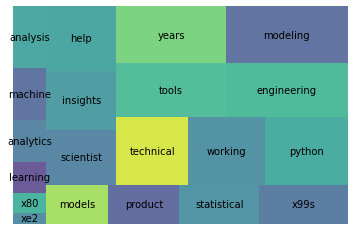

In [168]:
def squarify_plot(df, threshold=20):
    top_n = df[df['rank'] <= threshold]
    squarify.plot(sizes=top_n['rank'], 
                  label=top_n['word'],
                  alpha=0.8)
    plt.axis('off')
    plt.show()
    return

squarify_plot(word_count)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=STOP_WORDS)
dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

/Users/michael/opt/anaconda3/envs/4-1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106629,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [170]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [177]:
ideal = ['Use machine learning techniques to analyze sports']

In [178]:
tfidf_ideal = tfidf.transform(ideal)

In [186]:
ideal_job = nn.kneighbors(tfidf_ideal.todense())[1][0][0]

In [188]:
df['description'][ideal_job]

"b'Full-time Position  The Senior Data Scientist will be a skilled problem solver who has a passion for utilizing data to drive business decisions and interest in driving the sports industry forward. The position will involve working closely with the analytics and business intelligence teams for the planning, execution, and delivery of all KAGR analytics and data science products. Products may include a variety of predictive models, marketing analytics, forecasting, development of sales and business analytics, etc. Additionally, the Senior Data Scientist will be responsible for building new expertise within the Analytics & Data Science team through training and product R&D. The Company Kraft Analytics Group (KAGR) is technology and services company comprised of a brilliant group of data science and data analytics professionals who are at the top of their game in the sports and entertainment industry. This company is all about data-driven decision making that focuses on growing the bott

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 